=========================================================================================================================================================

In [ ]:
!pip install pandas numpy scikit-learn shap lime matplotlib seaborn streamlit joblib
# optionally xgboost if you want XGBoost
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 136.5 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=53f709ec640f48c916daefcd6816a17d83c00c903c504f73c4e8067553b4b4b3
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
!pip install -q numpy==1.26.4 pandas scikit-learn==1.5.2 matplotlib==3.9.2
!pip install -q shap==0.46.0 lime==0.2.0.1 tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 125.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 136.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 36.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python

✅ Dataset created: (600, 19)

📊 RandomForest metrics:
              precision    recall  f1-score   support

           0       0.50      0.13      0.21        46
           1       0.71      0.94      0.81       104

    accuracy                           0.69       150
   macro avg       0.61      0.54      0.51       150
weighted avg       0.65      0.69      0.62       150

Confusion:
 [[ 6 40]
 [ 6 98]]

📊 LogReg metrics:
              precision    recall  f1-score   support

           0       0.30      0.07      0.11        46
           1       0.69      0.93      0.80       104

    accuracy                           0.67       150
   macro avg       0.50      0.50      0.45       150
weighted avg       0.57      0.67      0.58       150

Confusion:
 [[ 3 43]
 [ 7 97]]
              accuracy  precision    recall        f1
model                                                
RandomForest  0.693333   0.710145  0.942308  0.809917
LogReg        0.666667   0.692857  0.932692  0.79

/tmp/ipython-input-832676479.py:130: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_stats = test_df.groupby("gender_Male_binary").apply(lambda g: pd.Series({



⚖️ Group metrics (RF):
                        n  accuracy  precision    recall        f1  \
gender_Male_binary                                                  
Female              68.0  0.705882   0.733333  0.916667  0.814815   
Male                82.0  0.682927   0.692308  0.964286  0.805970   

                    selection_rate  true_hire_rate  
gender_Male_binary                                  
Female                    0.882353        0.705882  
Male                      0.951220        0.682927  


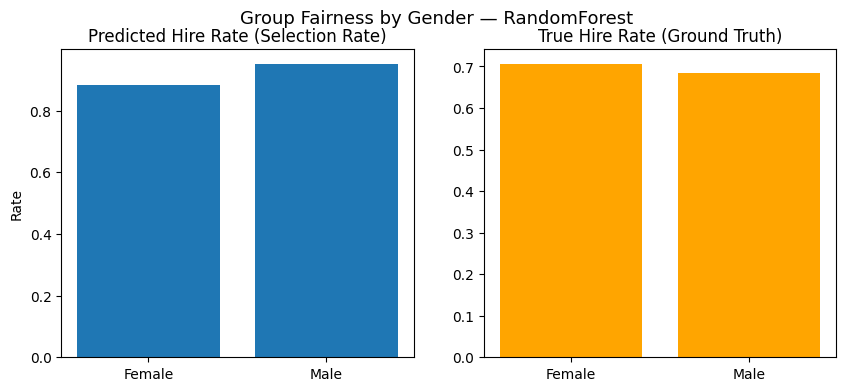

Shape of SHAP values for positive class: (150, 21)
Shape of X_test: (150, 21)


/tmp/ipython-input-832676479.py:187: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_df.values, X_test, feature_names=X_test.columns)


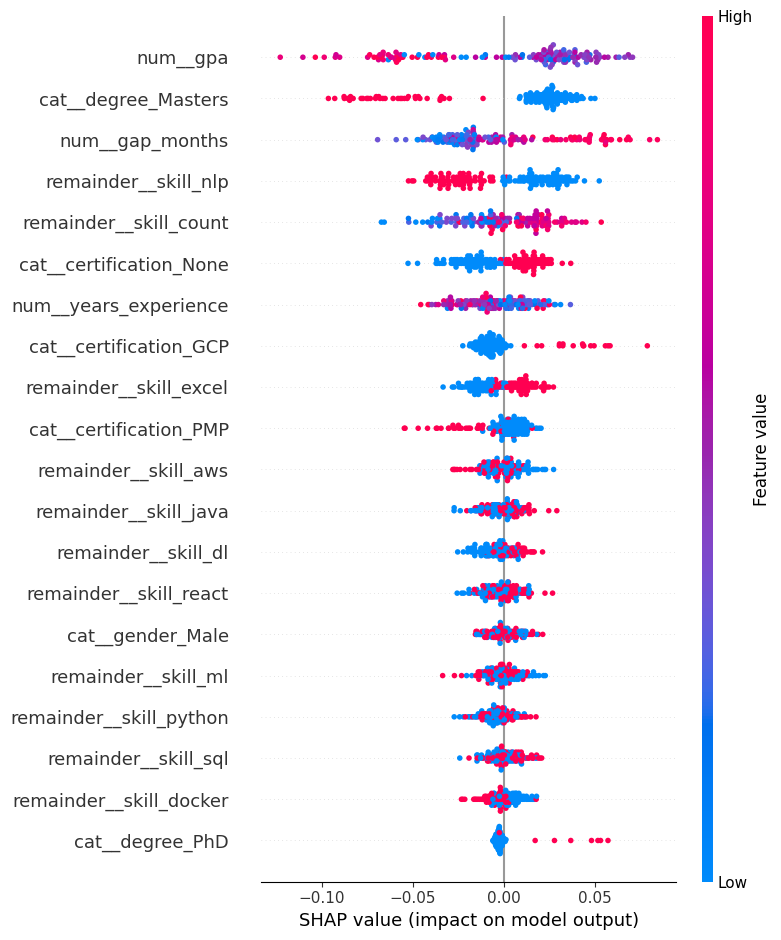

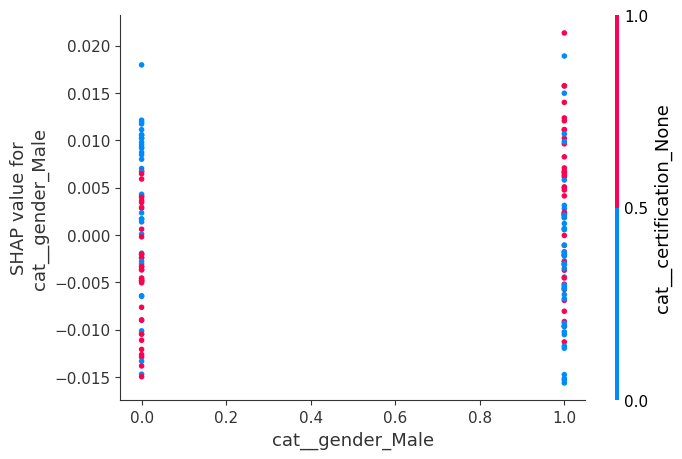

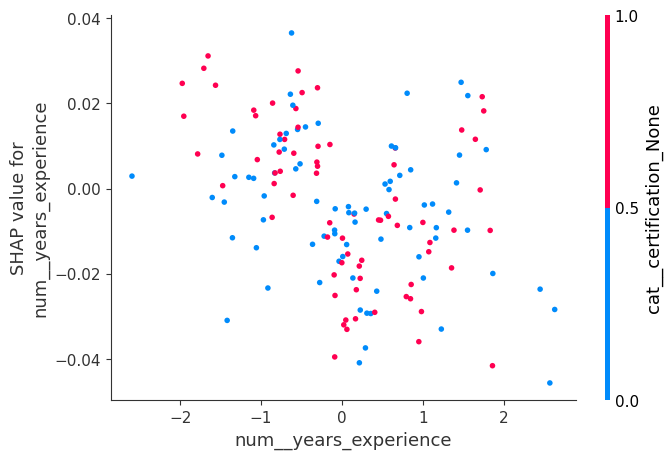

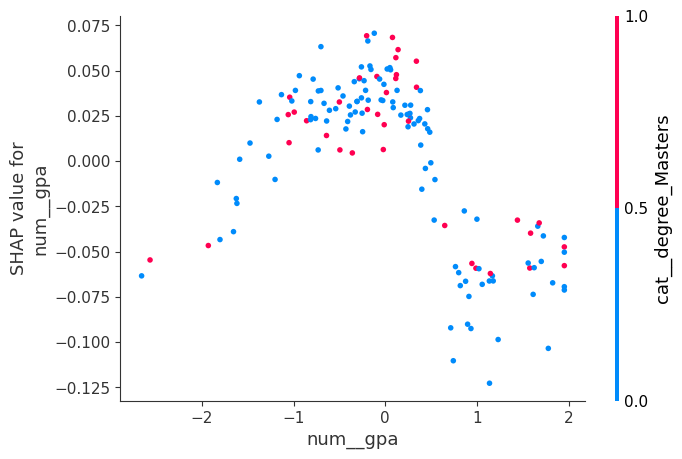


🔁 Counterfactual flips: 9 (6.00%)


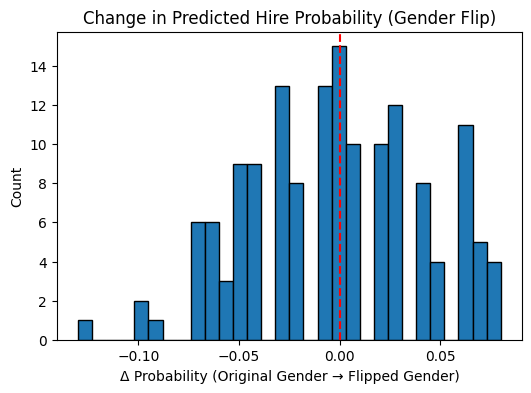

✅ Created X_train_df_lime successfully for LIME.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
# ==============================================================
# GENDER BIAS XAI DEMO (Colab-Ready)
# ==============================================================

import random, numpy as np, pandas as pd, matplotlib.pyplot as plt
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

if not hasattr(np, "bool"): np.bool = bool  # SHAP fix

# ----------------------------
# Synthetic dataset
# ----------------------------
def gen_name(gender):
    male = ["John","Michael","David","Daniel","James","Alex","Robert","Sam"]
    female = ["Emma","Olivia","Sophia","Ava","Isabella","Mia","Amelia","Emily"]
    last = ["Shah","Patel","Khan","Smith","Lee","Garcia","Chen","Singh"]
    return f"{random.choice(male if gender=='Male' else female)} {random.choice(last)}"

random.seed(42); np.random.seed(42)
n = 600
genders = np.random.choice(["Male","Female"], size=n, p=[0.55,0.45])
years_experience = np.random.normal(5,2,n).clip(0,15)
gpa = np.random.normal(3.2,0.4,n).clip(2.0,4.0)
gap_months = np.random.randint(0,24,n)
skill_count = np.random.randint(1,10,n)
degrees = np.random.choice(["Bachelors","Masters","PhD","Diploma"], n, p=[0.6,0.25,0.05,0.1])
certifications = np.random.choice(["None","PMP","GCP","DSCert"], n, p=[0.5,0.2,0.15,0.15])

base_prob = (
    0.1 * years_experience + 0.15 * (gpa - 2.5) + 0.03 * skill_count +
    np.where(genders=="Male", 0.1, -0.05)
)
hire_prob = 1 / (1 + np.exp(-base_prob))
hire = np.random.binomial(1, hire_prob)

df = pd.DataFrame({
    "name": [gen_name(g) for g in genders],
    "gender": genders,
    "years_experience": years_experience,
    "gpa": gpa,
    "gap_months": gap_months,
    "skill_count": skill_count,
    "degree": degrees,
    "certification": certifications,
    "hire": hire
})

for skill in ["python","ml","dl","nlp","sql","aws","docker","react","java","excel"]:
    df[f"skill_{skill}"] = np.random.binomial(1, 0.5, n)

print("✅ Dataset created:", df.shape)

# ----------------------------
# Preprocessing
# ----------------------------
categorical = ["gender","degree","certification"]
# Remove 'skill_count' from numerical features as it's included in 'skills'
numerical = ["years_experience","gpa","gap_months"]
skills = [c for c in df.columns if c.startswith("skill_")] # This will include skill_count
# Ensure no overlap by explicitly removing numerical features that are also in skills (though skill_count is the main one here)
numerical = [f for f in numerical if f not in skills]

X = df[categorical + numerical + skills].copy(); y = df["hire"] # Use .copy() to avoid SettingWithCopyWarning later

ct = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), categorical),
    ("num", StandardScaler(), numerical)
], remainder="passthrough") # remainder="passthrough" will handle the 'skills' columns

X_trans = ct.fit_transform(X)

# Get feature names correctly from the ColumnTransformer
final_feature_names = ct.get_feature_names_out()

# Create the final DataFrame X_final with correct feature names
X_final = pd.DataFrame(X_trans, columns=final_feature_names)


# ----------------------------
# Split + Model training
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, stratify=y, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train); lr.fit(X_train, y_train)

# Evaluation helper
def eval_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} metrics:")
    print(classification_report(y_test, y_pred))
    print("Confusion:\n", confusion_matrix(y_test, y_pred))
    return {
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

metrics = [eval_model(rf,"RandomForest"), eval_model(lr,"LogReg")]
print(pd.DataFrame(metrics).set_index("model"))

# ----------------------------
# Fairness metrics by gender
# ----------------------------
test_df = X_test.copy()
# Ensure 'cat__gender_Male' column exists after one-hot encoding
gender_col_name = 'cat__gender_Male' if 'cat__gender_Male' in X_test.columns else ('cat__gender_Female' if 'cat__gender_Female' in X_test.columns else None)

if gender_col_name:
    # Create a binary gender column (1 for Male, 0 for Female) based on the one-hot encoded column
    # Assuming 'Male' is the dropped category or the one encoded as 1 if drop=False
    # If drop='first', 'cat__gender_Male' will be 1 for Male, 0 for Female
    test_df["gender_Male_binary"] = test_df[gender_col_name]

    test_df["y_true"] = y_test.values
    test_df["rf_pred"] = rf.predict(X_test)
    test_df["rf_prob"] = rf.predict_proba(X_test)[:,1]

    # Group by the binary gender column
    group_stats = test_df.groupby("gender_Male_binary").apply(lambda g: pd.Series({
        "n": len(g),
        "accuracy": accuracy_score(g["y_true"], g["rf_pred"]),
        "precision": precision_score(g["y_true"], g["rf_pred"]),
        "recall": recall_score(g["y_true"], g["rf_pred"]),
        "f1": f1_score(g["y_true"], g["rf_pred"]),
        "selection_rate": g["rf_pred"].mean(),
        "true_hire_rate": g["y_true"].mean()
    }))
    # Rename index for clarity (0 -> Female, 1 -> Male)
    group_stats.index = group_stats.index.map({0: 'Female', 1: 'Male'})

    print("\n⚖️ Group metrics (RF):\n", group_stats)

    # Fairness bar plots
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    labels = group_stats.index.tolist() # Use actual group names
    sel_rates = group_stats["selection_rate"].values
    true_rates = group_stats["true_hire_rate"].values

    ax[0].bar(labels, sel_rates)
    ax[0].set_title("Predicted Hire Rate (Selection Rate)")
    ax[0].set_ylabel("Rate")

    ax[1].bar(labels, true_rates, color="orange")
    ax[1].set_title("True Hire Rate (Ground Truth)")
    plt.suptitle("Group Fairness by Gender — RandomForest", fontsize=13)
    plt.show()
else:
    print("\n⚠️ Could not find gender column for fairness analysis.")


# ----------------------------
# SHAP global explainability
# ----------------------------
# Use X_test and the trained model rf
explainer = shap.TreeExplainer(rf)
shap_values = explainer(X_test) # Calculate SHAP values on the test set

# Assuming binary classification, get SHAP values for the positive class (hire=1)
# shap_values is an Explanation object for unified explainer, list for TreeExplainer
if isinstance(shap_values, list): # TreeExplainer output
    shap_values_positive_class = shap_values[1]
else: # Unified Explainer output
     shap_values_positive_class = shap_values[:,:,1].values # assuming multiclass output format

print("Shape of SHAP values for positive class:", shap_values_positive_class.shape)
print("Shape of X_test:", X_test.shape)

# Ensure SHAP values and X_test have the same number of columns for plotting
if shap_values_positive_class.shape[1] == X_test.shape[1]:
    # Convert SHAP values to DataFrame for plotting
    shap_values_df = pd.DataFrame(shap_values_positive_class, columns=X_test.columns)

    #shap.summary_plot(shap_values_df, X_test, feature_names=X_test.columns)

    # Ensure correct array shape for plotting
    shap.summary_plot(shap_values_df.values, X_test, feature_names=X_test.columns)

    for feat in ["cat__gender_Male","num__years_experience","num__gpa"]:
        # Check if the feature exists in the test set columns before plotting dependence
        if feat in X_test.columns:
            shap.dependence_plot(feat, shap_values_positive_class, X_test, show=True)
        else:
            print(f"Skipping dependence plot for '{feat}' as it's not in test set columns.")

else:
    print("Skipping SHAP plots due to shape mismatch between SHAP values and X_test.")
    print(f"SHAP values shape: {shap_values_positive_class.shape}, X_test shape: {X_test.shape}")


# ----------------------------
# Counterfactual flip test
# ----------------------------
X_cf = X_test.copy()
# Ensure 'cat__gender_Male' column exists for flipping
if 'cat__gender_Male' in X_cf.columns:
    X_cf["cat__gender_Male"] = 1 - X_cf["cat__gender_Male"]
    prob_orig = rf.predict_proba(X_test)[:,1]
    prob_cf = rf.predict_proba(X_cf)[:,1]
    pred_orig = rf.predict(X_test)
    pred_cf = rf.predict(X_cf)

    cf_df = pd.DataFrame({
        "orig_gender": np.where(X_test["cat__gender_Male"]==1,"Male","Female"),
        "prob_orig": prob_orig, "prob_cf": prob_cf,
        "pred_orig": pred_orig, "pred_cf": pred_cf,
        "delta_prob": prob_cf - prob_orig
    })
    cf_df["flip"] = cf_df["pred_orig"] != cf_df["pred_cf"]
    flip_rate = 100 * cf_df["flip"].mean()
    print(f"\n🔁 Counterfactual flips: {cf_df['flip'].sum()} ({flip_rate:.2f}%)")

    plt.figure(figsize=(6,4))
    plt.hist(cf_df["delta_prob"], bins=30, edgecolor="k")
    plt.axvline(0, color="red", linestyle="--")
    plt.title("Change in Predicted Hire Probability (Gender Flip)")
    plt.xlabel("Δ Probability (Original Gender → Flipped Gender)")
    plt.ylabel("Count")
    plt.show()
else:
     print("\n⚠️ Could not find gender column for counterfactual flip test.")


# ----------------------------
# LIME local explanation
# ----------------------------
# Ensure X_train_df is created for LIME
# X_train is already defined and is a pandas DataFrame from the train/test split
# Use the final_feature_names generated after preprocessing
try:
    # Create X_train_df explicitly using X_train and final_feature_names
    X_train_df_lime = pd.DataFrame(X_train, columns=final_feature_names)
    print("✅ Created X_train_df_lime successfully for LIME.")

    lime_exp = LimeTabularExplainer(
        training_data=X_train_df_lime.values, # Use the values from the DataFrame
        feature_names=X_train_df_lime.columns.tolist(), # Use column names from the DataFrame
        class_names=["NoHire","Hire"],
        mode="classification"
    )
    # Select an index from the test set (using X_test which is a DataFrame)
    idx = random.randint(0, len(X_test)-1)
    # Use the corresponding row from the processed test set DataFrame
    exp = lime_exp.explain_instance(X_test.iloc[idx].values, rf.predict_proba, num_features=8)
    exp.show_in_notebook(show_table=True)
except NameError as e:
    print(f"An error occurred during LIME explanation due to a NameError: {e}. Ensure all necessary variables (like final_feature_names, X_train, X_test, rf) are defined before this section.")
except Exception as e:
    print(f"An error occurred during LIME explanation: {e}")

✅ LIME Local Explanations — 3 Example Candidates

In [ ]:
# --- LIME LOCAL EXPLANATIONS ---
from lime.lime_tabular import LimeTabularExplainer

# We’ll reuse X_train, X_test, y_train, y_test, final_feature_names, rf
X_train_array = X_train.to_numpy()
X_test_array  = X_test.to_numpy()

# Define LIME explainer (binary classification)
lime_explainer = LimeTabularExplainer(
    training_data = X_train_array,
    feature_names = final_feature_names,
    class_names = ["Not Hired", "Hired"],
    discretize_continuous = True,
    mode = "classification"
)

# Pick 3 representative samples (as in SHAP section)
# Use 'rf' instead of 'rf_model'
idx_high = np.argmax(rf.predict_proba(X_test_array)[:,1])   # definitely hired
idx_low  = np.argmin(rf.predict_proba(X_test_array)[:,1])   # definitely rejected
idx_mid  = np.argsort(np.abs(rf.predict_proba(X_test_array)[:,1]-0.5))[0]  # borderline

sample_indices = [idx_high, idx_mid, idx_low]
print("Example indices:", sample_indices)

lime_results = []

for i in sample_indices:
    exp = lime_explainer.explain_instance(
        X_test_array[i],
        # Use 'rf' instead of 'rf_model'
        rf.predict_proba,
        num_features = 10
    )
    print(f"\n🟩 LIME explanation for sample index {i}:")
    exp.show_in_notebook(show_table=True)
    lime_results.append(exp.as_list())

# Optional: store results as a readable table
import pandas as pd
lime_df = pd.DataFrame({
    f"Sample_{i}": dict(exp) for i, exp in zip(sample_indices, lime_results)
}).fillna("")

print("\nTop LIME feature contributions (positive → increases hire probability):")
display(lime_df)

Example indices: [np.int64(132), np.int64(23), np.int64(106)]

🟩 LIME explanation for sample index 132:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names



🟩 LIME explanation for sample index 23:



🟩 LIME explanation for sample index 106:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Top LIME feature contributions (positive → increases hire probability):


Sample_132 Sample_23 Sample_106
cat__degree_Masters <= 0.00             0.088888  0.083396           
num__gap_months > 0.91                  0.062235                     
-0.73 < num__gpa <= -0.03               0.048209                     
remainder__skill_nlp <= 0.00            0.045134                     
cat__degree_PhD <= 0.00                -0.037137 -0.037528  -0.039414
cat__certification_GCP > 0.00           0.037067                     
remainder__skill_count <= 3.00         -0.031747            -0.023585
cat__certification_None <= 0.00        -0.029607 -0.035953  -0.034565
cat__certification_PMP <= 0.00          0.026854                     
remainder__skill_excel <= 0.00         -0.017579                     
num__gpa > 0.67                                  -0.071182  -0.065747
0.00 < remainder__skill_nlp <= 1.00              -0.041401  -0.043796
cat__certification_GCP <= 0.00                   -0.041066  -0.042792
cat__certification_PMP > 0.00                    -0.025636  -0.024137
0.00 < remainder__skill_excel <= 1.00              0.02288           
-0.02 < num__years_experience <= 0.60            -0.019138  -0.026035
3.00 < remainder__skill_count <= 5.00            -0.013224           
0.00 < cat__degree_Masters <= 1.00                          -0.085885
num__gap_months <= -0.96                                    -0.023397

In [ ]:
dashboard1             34nOfVG8p8wr8CQLQRTZrPLlX9w_4t6uqtLTpZLfmSpXuDu1j

In [ ]:
# Cell 1: Install required packages
!pip install streamlit pyngrok pandas plotly scikit-learn

# Cell 2: Create Streamlit app file
with open('app.py', 'w') as f:
    f.write('''
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Page config
st.set_page_config(page_title="XAI Dashboard", layout="wide", page_icon="📊")

# Title
st.title("🤖 Resume Bias Analysis Dashboard")
st.markdown("---")

# Sidebar
st.sidebar.header("⚙️ Configuration")
uploaded_file = st.sidebar.file_uploader("Upload CSV Dataset", type=['csv'])

if uploaded_file is not None:
    # Load data
    df = pd.read_csv(uploaded_file)

    # Sidebar options
    st.sidebar.subheader("Data Preview")
    show_rows = st.sidebar.slider("Number of rows to display", 5, 50, 10)

    # Main content
    tab1, tab2, tab3, tab4 = st.tabs(["📊 Data Overview", "📈 Visualizations", "🤖 Model Training", "📉 Results"])

    with tab1:
        st.header("Dataset Overview")

        col1, col2, col3, col4 = st.columns(4)
        with col1:
            st.metric("Total Rows", df.shape[0])
        with col2:
            st.metric("Total Columns", df.shape[1])
        with col3:
            st.metric("Numeric Columns", df.select_dtypes(include=[np.number]).shape[1])
        with col4:
            st.metric("Missing Values", df.isnull().sum().sum())

        st.subheader("Data Preview")
        st.dataframe(df.head(show_rows), use_container_width=True)

        st.subheader("Statistical Summary")
        st.dataframe(df.describe(), use_container_width=True)

        st.subheader("Column Information")
        col_info = pd.DataFrame({
            'Column': df.columns,
            'Type': df.dtypes.values,
            'Missing': df.isnull().sum().values,
            'Unique': [df[col].nunique() for col in df.columns]
        })
        st.dataframe(col_info, use_container_width=True)

    with tab2:
        st.header("Data Visualizations")

        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

        if len(numeric_cols) >= 2:
            col1, col2 = st.columns(2)

            with col1:
                st.subheader("Distribution Plot")
                selected_col = st.selectbox("Select column for distribution", numeric_cols, key='dist')
                fig = px.histogram(df, x=selected_col, marginal="box",
                                 title=f"Distribution of {selected_col}")
                st.plotly_chart(fig, use_container_width=True)

            with col2:
                st.subheader("Correlation Heatmap")
                corr_matrix = df[numeric_cols].corr()
                fig = px.imshow(corr_matrix,
                              text_auto=True,
                              aspect="auto",
                              title="Feature Correlation Matrix")
                st.plotly_chart(fig, use_container_width=True)

            st.subheader("Scatter Plot")
            col1, col2 = st.columns(2)
            with col1:
                x_axis = st.selectbox("X-axis", numeric_cols, key='x')
            with col2:
                y_axis = st.selectbox("Y-axis", numeric_cols, index=1 if len(numeric_cols) > 1 else 0, key='y')

            fig = px.scatter(df, x=x_axis, y=y_axis, title=f"{x_axis} vs {y_axis}")
            st.plotly_chart(fig, use_container_width=True)
        else:
            st.warning("Not enough numeric columns for visualizations")

    with tab3:
        st.header("Model Training")

        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

        if len(numeric_cols) >= 2:
            target_col = st.selectbox("Select Target Column", df.columns)
            feature_cols = st.multiselect("Select Feature Columns",
                                         [col for col in numeric_cols if col != target_col],
                                         default=[col for col in numeric_cols if col != target_col][:3])

            col1, col2 = st.columns(2)
            with col1:
                test_size = st.slider("Test Size", 0.1, 0.5, 0.2)
            with col2:
                random_state = st.number_input("Random State", 0, 100, 42)

            if st.button("🚀 Train Model", type="primary"):
                if len(feature_cols) > 0:
                    with st.spinner("Training model..."):
                        # Prepare data
                        X = df[feature_cols].fillna(df[feature_cols].mean())
                        y = df[target_col].fillna(df[target_col].mode()[0])

                        # Check if classification or regression
                        is_classification = y.nunique() < 20

                        if is_classification:
                            X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=test_size, random_state=random_state
                            )

                            model = RandomForestClassifier(n_estimators=100, random_state=random_state)
                            model.fit(X_train, y_train)

                            # Predictions
                            y_pred = model.predict(X_test)
                            accuracy = accuracy_score(y_test, y_pred)

                            # Store in session state
                            st.session_state['model'] = model
                            st.session_state['accuracy'] = accuracy
                            st.session_state['y_test'] = y_test
                            st.session_state['y_pred'] = y_pred
                            st.session_state['feature_cols'] = feature_cols
                            st.session_state['X_test'] = X_test

                            st.success(f"✅ Model trained successfully! Accuracy: {accuracy:.2%}")
                        else:
                            st.warning("Regression detected. Using RandomForestClassifier for demonstration.")
                else:
                    st.error("Please select at least one feature column")
        else:
            st.warning("Not enough numeric columns for model training")

    with tab4:
        st.header("Model Results")

        if 'model' in st.session_state:
            col1, col2, col3 = st.columns(3)
            with col1:
                st.metric("Accuracy", f"{st.session_state['accuracy']:.2%}")
            with col2:
                st.metric("Test Samples", len(st.session_state['y_test']))
            with col3:
                st.metric("Features Used", len(st.session_state['feature_cols']))

            # Confusion Matrix
            st.subheader("Confusion Matrix")
            cm = confusion_matrix(st.session_state['y_test'], st.session_state['y_pred'])
            fig = px.imshow(cm, text_auto=True,
                          labels=dict(x="Predicted", y="Actual"),
                          title="Confusion Matrix")
            st.plotly_chart(fig, use_container_width=True)

            # Feature Importance
            st.subheader("Feature Importance")
            importance_df = pd.DataFrame({
                'Feature': st.session_state['feature_cols'],
                'Importance': st.session_state['model'].feature_importances_
            }).sort_values('Importance', ascending=False)

            fig = px.bar(importance_df, x='Importance', y='Feature',
                        orientation='h', title="Feature Importance")
            st.plotly_chart(fig, use_container_width=True)

            # Classification Report
            st.subheader("Classification Report")
            report = classification_report(st.session_state['y_test'],
                                          st.session_state['y_pred'],
                                          output_dict=True)
            st.dataframe(pd.DataFrame(report).transpose(), use_container_width=True)
        else:
            st.info("👈 Train a model first in the 'Model Training' tab")
else:
    st.info("👈 Please upload a CSV file to get started")

    # Demo section
    st.markdown("---")
    st.header("📝 How to Use")
    st.markdown("""
    1. **Upload Data**: Use the sidebar to upload your CSV dataset
    2. **Explore Data**: Check the Data Overview tab to understand your dataset
    3. **Visualize**: Create interactive visualizations in the Visualizations tab
    4. **Train Model**: Configure and train a machine learning model
    5. **View Results**: Analyze model performance and feature importance
    """)
''')

# Cell 3: Setup ngrok authentication
from pyngrok import ngrok, conf
import getpass

# Get ngrok auth token
print("Get your ngrok auth token from: https://dashboard.ngrok.com/get-started/your-authtoken")
ngrok_token = getpass.getpass("Enter your ngrok auth token: ")
ngrok.set_auth_token(ngrok_token)

# Cell 4: Run Streamlit with ngrok
import os
import subprocess
import time
from pyngrok import ngrok

# Kill any existing Streamlit processes
os.system("pkill -f streamlit")
time.sleep(2)

# Start Streamlit in background
streamlit_process = subprocess.Popen(
    ["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print("⏳ Starting Streamlit server...")
time.sleep(10)  # Wait for Streamlit to fully start

# Create ngrok tunnel
print("🔗 Creating ngrok tunnel...")
public_url = ngrok.connect(8501, bind_tls=True)

print("\n" + "="*60)
print("🚀 Streamlit Dashboard is LIVE!")
print("="*60)
print(f"\n📊 Access your dashboard at:\n")
print(f"   {public_url.public_url}")
print(f"\n")
print("="*60)
print("\n⚠️  IMPORTANT: Keep this cell running!")
print("🛑 To stop: Click 'Stop' button or interrupt the kernel\n")

# Keep the cell running
try:
    streamlit_process.wait()
except KeyboardInterrupt:
    print("\n✋ Stopping servers...")
    streamlit_process.terminate()
    ngrok.disconnect(public_url.public_url)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.3 MB/s eta 0:00:00
Get your ngrok auth token from: https://dashboard.ngrok.com/get-started/your-authtoken
